https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [1]:
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

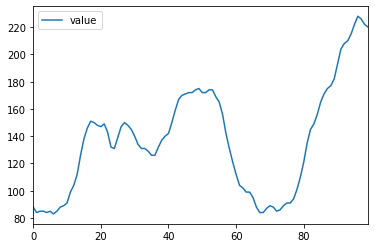

In [3]:
_ = df.plot()

# Difference term (d)

The difference term is the number of difference levels required to make the series stationary.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

In [4]:
adf_result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -2.464240
p-value: 0.124419


p-value greater than 0.05 => not confirmed to be stationary.  Try differencing.

In [5]:
def plot_series_with(series, title, plot_func, ylim=None):
    ### Plot a series with a side-by-side related plot function
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8, 2), dpi=150)
    axes[0].plot(series)
    axes[0].set_title(title)
    if ylim:
        axes[1].set_ylim(-ylim, ylim)
    plot_func(series, ax=axes[1], lags=len(series) - 1)
    plt.show()

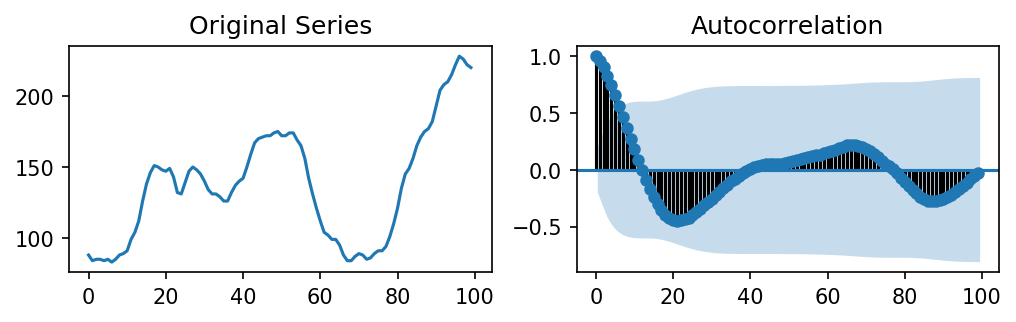

In [6]:
plot_series_with(df.value, "Original Series", plot_acf)

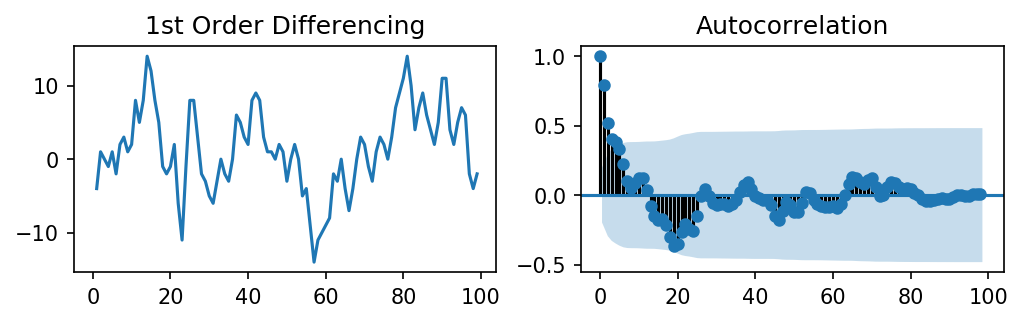

ADF p-Value: 0.070268


In [7]:
y = df.value.diff().dropna()
plot_series_with(y, "1st Order Differencing", plot_acf)
print("ADF p-Value: %f" % adfuller(y)[1])

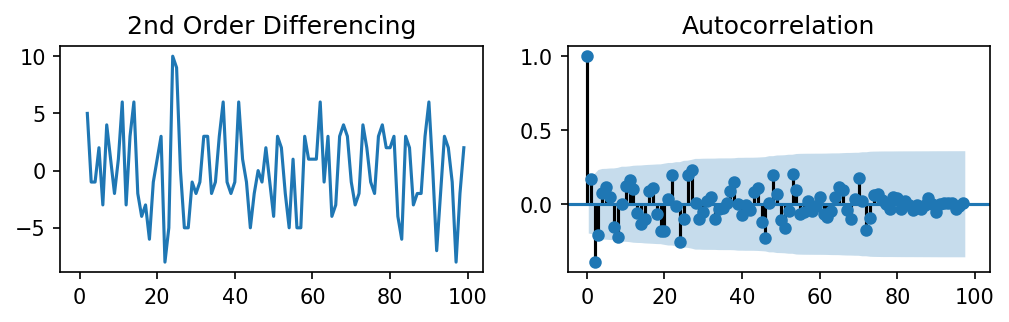

ADF p-Value: 0.000000


In [8]:
y = df.value.diff().diff().dropna()
plot_series_with(y, "2nd Order Differencing", plot_acf)
print("ADF p-Value: %f" % adfuller(y)[1])

For the above series, the time series reaches stationarity with two orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced. 

ndiffs() estimates the difference level required to make series stationary.

In [9]:
from pmdarima.arima.utils import ndiffs

y = df.value
print("ADF: %d" % ndiffs(y, test='adf'))
print("KPSS: %d" % ndiffs(y, test='kpss'))
print("PP: %d" % ndiffs(y, test='pp'))

ADF: 2
KPSS: 0
PP: 2


`d=1` has weak stationarity, but `d=2` might be overfitting.

# AR term (p)

`p` should be the based on the number of PACF lags that cross the significance boundary.

/home/chad/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


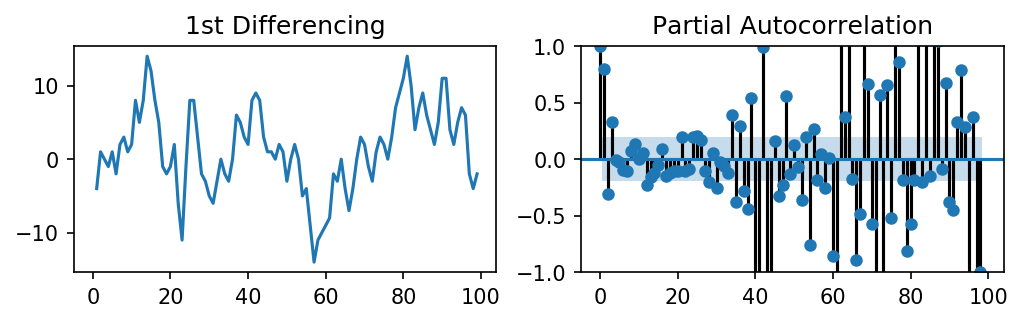

In [10]:
plot_series_with(df.value.diff().dropna(), "1st Differencing", plot_pacf, 1)

lag-1 is well outside the boundary.  lag-2 and lag-3 are barely outside the boundary.  We might select `p=1`, tentatively.